In [1]:
! pip install yfinance 

import yfinance as yf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = yf.download("BTC-USD", start="2017-01-01", end="2022-01-01")
data.head(5)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984


In [3]:
data.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2021-12-31,47169.371094,48472.527344,45819.953125,46306.445312,46306.445312,36974172400


In [4]:
# We are interested in all available data, Close price, daily
data = data.drop(axis=1, columns= ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data.head()

,Close
Date,
2016-12-31,963.742981
2017-01-01,998.325012
2017-01-02,1021.750000
2017-01-03,1043.839966
2017-01-04,1154.729980


In [5]:
data.shape

(1827, 1)

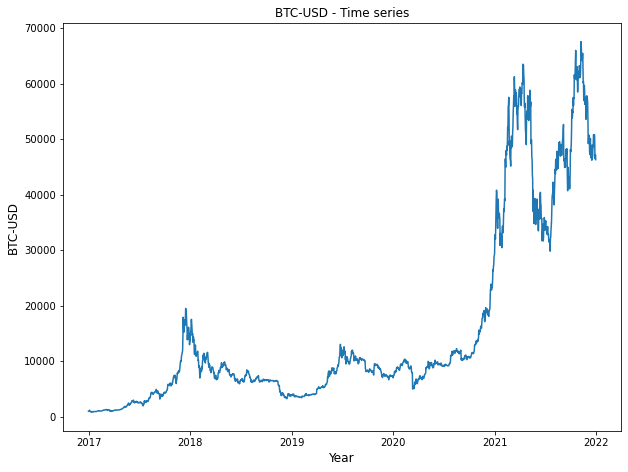

In [6]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(data)
plt.title('BTC-USD - Time series')
plt.xlabel('Year', fontsize=12)
plt.ylabel("BTC-USD",  fontsize =12)
plt.show()

#Data are non stationary

In [7]:
# Let’s pass our data frame into the adfuller method. 
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)


print('ADF Test Statistic: %.2f' % result[0]) #critical value from statistics
print('5%% Critical Value: %.2f' % result[4]['5%']) # critical value from table
print('p-value: %.2f' % result[1])



ADF Test Statistic: -0.72
5% Critical Value: -2.86
p-value: 0.84


In [8]:
# Store our results in a dataframe display it
pd.DataFrame(result)

,0
0,-0.720524
1,0.841362
2,24
3,1802
4,"{'1%': -3.4339840952648695, '5%': -2.863145250..."
5,29672.094297


In [9]:
#Code for Durbin Watson test
import numpy as np
import statsmodels.api as sm

X =np.arange(len(data))
Y = np.asarray(data)
X = sm.add_constant(X)

from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()

# apply durbin watson statistic on the ols residual
print(durbin_watson(ols_res.resid))

print('')
print('There is a positive autocorrelation. The more close it to 0, the more signs of positive autocorrelation.')

0.00688155128095405

There is a positive autocorrelation. The more close it to 0, the more signs of positive autocorrelation.


Close


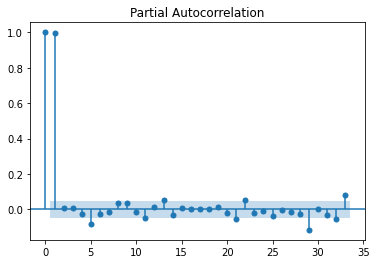

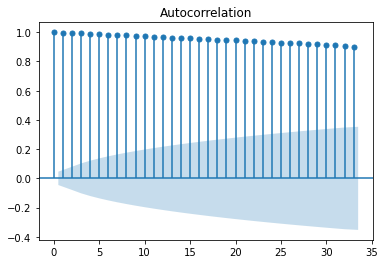

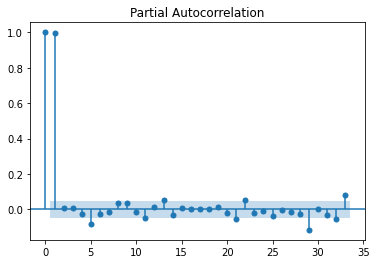

In [10]:
#Plot Autocorrelation and partial autocorrelation

from statsmodels.tsa.stattools import acf

#Correlation
#Each line represents a lag, there is a significant correlation between the variables. 
print('Close')
plot_acf(data['Close'])



#partial autocorrelation
plot_pacf(data['Close'])


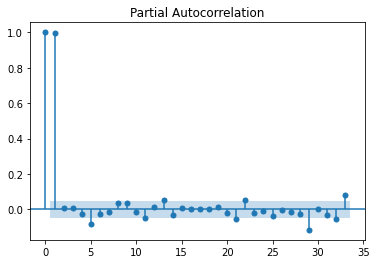

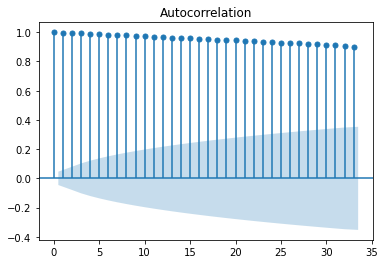

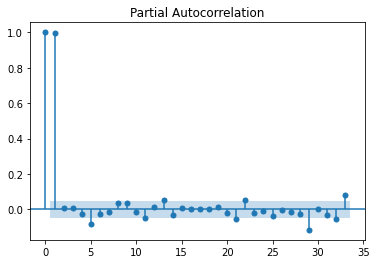

In [11]:
# Plot Autocorrelation and partial correlation
from statsmodels.tsa.stattools import acf
# Correlation
#Each line represents a lag, there is a significant correlation between the variables. 

plot_acf(data['Close'])


#partial autocorrelation
plot_pacf(data['Close'])

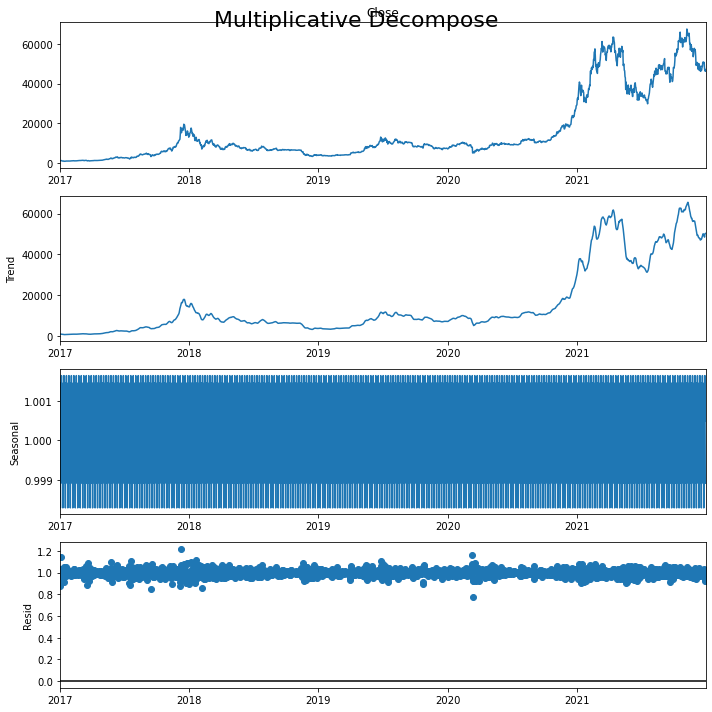

In [12]:
#Decomposition : make a hypothesis that we use the multiplicatif label

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data['Close'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()

#4th chart : resid = error